In [304]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry
from collections import Counter
import numpy as np

In [230]:
dframe_research = pd.read_excel("management_accounting_research_web_of_science_2021.08.29.xlsx")

In [326]:
df_document_type = dframe_research.groupby(by=['Document Type'], as_index=False)['Authors'].count()
df_document_type.columns = ['Document_Type','Qty']
df_document_type.sort_values(by='Qty', ascending=False).to_excel("document_type.xlsx", index=False)

<h2> Getting Countries information from database

In [232]:
initial_list = dframe_research['Addresses'].fillna("no address").to_list()

In [233]:
countries_list = []
for country in pycountry.countries:
    countries_list.append(country.name)
countries_list.append("England")
countries_list.append("Scotland")
countries_list.append("Wales")
countries_list.append("Northern Ireland")
countries_list.append("USA")

In [234]:
all_countries = []
for address in initial_list:
    countries_on_this_row = []
    for country in countries_list:
        if country in address:
            countries_on_this_row.append(country)
    all_countries.append("; ".join(countries_on_this_row))

In [235]:
dframe_research['Countries'] = all_countries

In [325]:
dframe_research.groupby(by=['Countries'], as_index=False)['Authors'].count().sort_values(by=['Authors'], ascending=False).to_excel("countries.xlsx", index = False)

<h2> Getting Authors information

In [246]:
all_authors = []
for author in dframe_research['Author Full Names']:
    all_authors.append(author.split(";"))

In [248]:
all_authors_flat_list = [item for sublist in all_authors for item in sublist]

In [251]:
all_authors_flat_list = [i.strip() for i in all_authors_flat_list]

In [259]:
df_all_authors = pd.DataFrame.from_dict(Counter(all_authors_flat_list), orient='index').reset_index()
df_all_authors.columns = ['author_name','number_of_records']

In [324]:
df_all_authors.sort_values(by=['number_of_records'], ascending=False).to_excel("authors.xlsx", index=False)

<h2> Getting Keywords information only from Articles

In [269]:
all_keywords = []
for keyword in dframe_research.query("`Document Type`=='Article'")['Author Keywords'].fillna("No keywords"):
    all_keywords.append(keyword.split(";"))

In [273]:
all_keywords_flat_list = [item for sublist in all_keywords for item in sublist]
all_keywords_flat_list = [i.strip() for i in all_keywords_flat_list]
df_all_keywords = pd.DataFrame.from_dict(Counter(all_keywords_flat_list), orient='index').reset_index()
df_all_keywords.columns = ['keyword','number_of_records']

In [323]:
df_all_keywords.sort_values(by=['number_of_records'], ascending=False).to_excel('keywords.xlsx', index=False)

<h2> Building a wordcloud for Abstract

In [277]:
# Importing stopwords in English
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivanr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [301]:
stopwords.append("elsevier")
stopwords.append("rights")
stopwords.append("reserved")
stopwords.append("cltd")
stopwords.append("ltd")
stopwords.append("use")
stopwords.append("c")

In [285]:
all_abstracts = []
for abstract in dframe_research.query("`Document Type`=='Article'")['Abstract']:
    all_abstracts.append(abstract.split(" "))

In [289]:
all_abstracts_flat_list = [item for sublist in all_abstracts for item in sublist] #flatten
all_abstracts_flat_list = [i.strip().lower() for i in all_abstracts_flat_list] #strip & lower

In [291]:
#Creating a big text from abstracts
all_abstracts = " ".join(all_abstracts_flat_list)

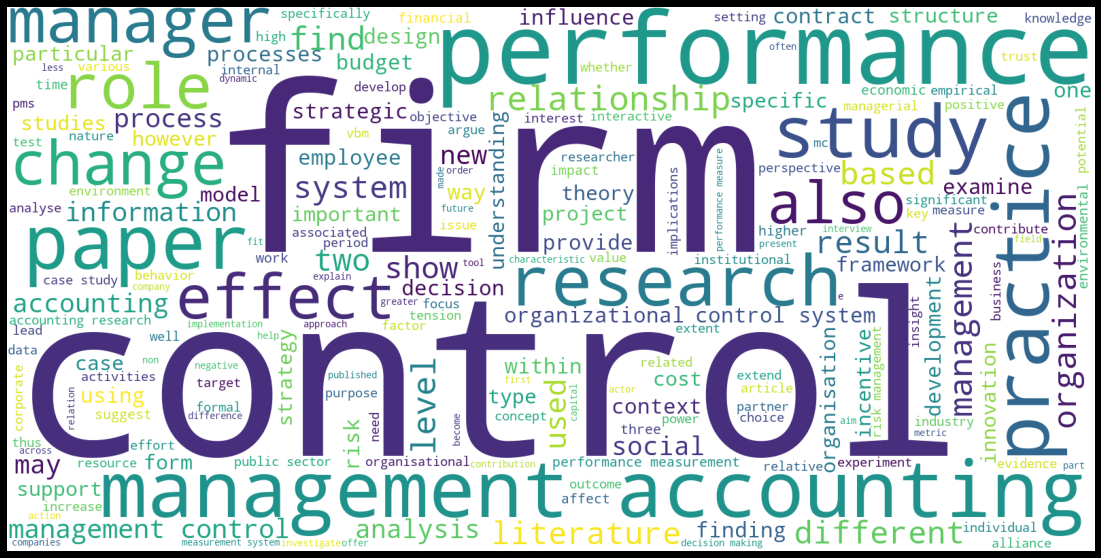

In [303]:
#Let's plot a WordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color="white",stopwords=stopwords).generate(all_abstracts)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud_all_management_account_research.png', facecolor='k', bbox_inches='tight')

In [327]:
dframe_research.to_excel("dframe_research_processed.xlsx", index=False)